In [21]:
# %matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [22]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [23]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [24]:
# create engine to hawaii.sqlite
path = "../Resources/hawaii.sqlite"
engine = create_engine("sqlite:///" + path)

In [25]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [26]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [29]:
# Save references to each table
precipitation = Base.classes.measurement
station = Base.classes.station

In [28]:
# Create our session (link) from Python to the DB
session = Session(engine)


# Exploratory Precipitation Analysis

In [30]:
# Display the row's columns and data in dictionary format
first_row = session.query(precipitation).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1ddc0460408>,
 'tobs': 65.0,
 'id': 1,
 'date': '2010-01-01',
 'prcp': 0.08,
 'station': 'USC00519397'}

In [31]:
# Find the most recent date in the data set.
session.query(precipitation.date).order_by(precipitation.date.desc()).first()

('2017-08-23',)

<Figure size 892.8x1209.6 with 0 Axes>

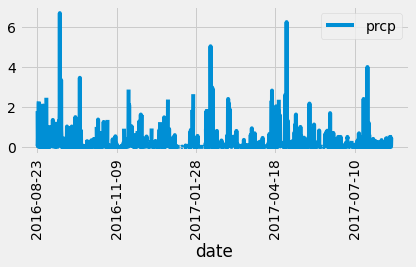

In [60]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
last_12_months = session.query(precipitation.date, precipitation.prcp).\
    filter(precipitation.date >= query_date)

# Save the query results as a Pandas DataFrame and set the index to the date column
last_df = pd.DataFrame(last_12_months, columns=['date', 'prcp'])
last_df.set_index('date', inplace=True)

# Sort the dataframe by date
last_df.sort_values(by = 'date', inplace=True)

# # Use Pandas Plotting with Matplotlib to plot the data
plt.figure(figsize=[12.4,16.8])
last_df.plot(rot=90)
plt.tight_layout()
plt.show()




In [53]:
# Use Pandas to calcualte the summary statistics for the precipitation data
last_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [ ]:
# Design a query to calculate the total number stations in the dataset


In [ ]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.


In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close session

In [ ]:
# Close Session
session.close()